In [35]:
import h5py
import numpy as np
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
folder_from_colab = '/Users/emily/data/FLIRcam/ForTracking/use_me/from_colab'
h5_files = [f for f in os.listdir(folder_from_colab) if f.endswith('cleaned.h5')]

# iterate over .h5 files in folder
for file in h5_files:
    filename = os.path.join(folder_from_colab, file)
    with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    print("===filename===")
    print(filename)
    print()

    print("===HDF5 datasets===")
    print(dset_names)
    print()

    print("===locations data shape===")
    print(locations.shape)
    print()

    print("===nodes===")
    for i, name in enumerate(node_names):
        print(f"{i}: {name}")
    print()

===filename===
/Users/emily/data/FLIRcam/ForTracking/use_me/from_colab/20221229124843603_n5_25_bone.avi.000_20221229124843603_n5_25_bone.analysis_cleaned.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(11550, 3, 2, 116)

===nodes===
0: eye
1: base_leg
2: base_tail

===filename===
/Users/emily/data/FLIRcam/ForTracking/use_me/from_colab/20221215122046189_-5_25_bone.avi.000_20221215122046189_-5_25_bone.analysis_cleaned.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(1646, 3, 2, 64)

===nodes===
0: eye
1: base_leg
2: base_tail

===filename===
/Users/emily/data/FLIRcam/ForTracking/use_me/from_col

BlockingIOError: [Errno 35] Unable to synchronously open file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

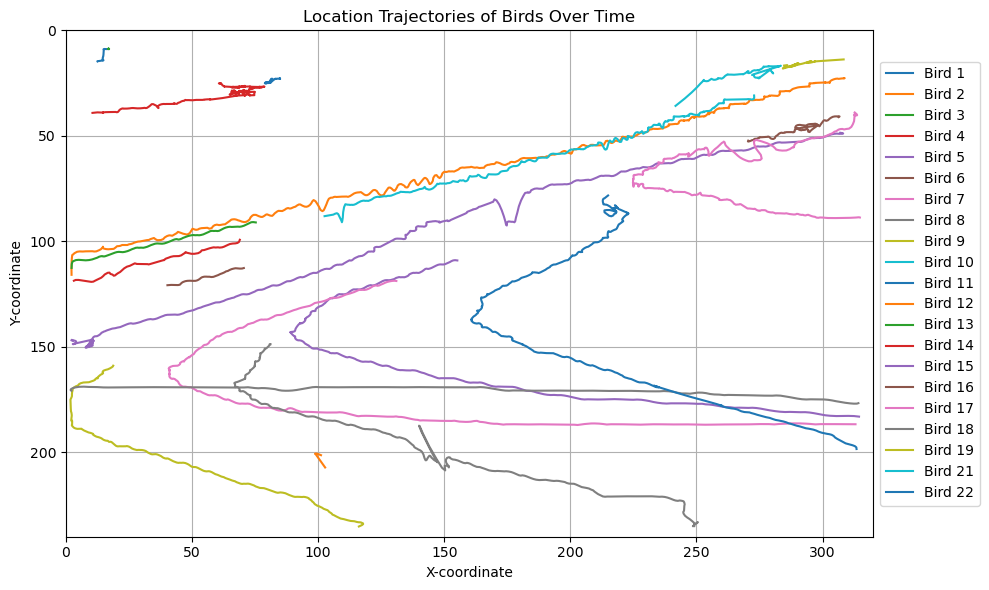

In [27]:
# Plot some example trajectories
filename = '/Users/emily/data/FLIRcam/ForTracking/use_me/from_colab/20221215122046189_-5_25_bone.avi.000_20221215122046189_-5_25_bone.analysis_cleaned.h5'
with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]
# Create a single plot
plt.figure(figsize=(10, 6))

# Loop through each bird to plot its trajectory
for bird in range(22):
    # Extract x and y coordinates for the bird across all timesteps
    x_coordinates = locations[:, 0, 0, bird]
    y_coordinates = locations[:, 0, 1, bird]

    non_nan_count = np.sum(~np.isnan(x_coordinates))
    if non_nan_count > 30:
        plt.plot(x_coordinates, y_coordinates, label=f'Bird {bird+1}')

# Setting labels, title, limits, and legend
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Location Trajectories of Birds Over Time")
plt.xlim((0, 320))
plt.ylim((0, 240))
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

In [34]:
# load each of the analysis files, make a video
import real_data_plotting
from importlib import reload
reload(real_data_plotting)

folder_from_colab = '/Users/emily/data/FLIRcam/ForTracking/use_me/six_tracked_videos'
h5_files = [f for f in os.listdir(folder_from_colab) if f.endswith('cleaned.h5')]

# iterate over .h5 files in folder
for file in h5_files:
    filename = os.path.join(folder_from_colab, file)
    with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]
        
    # Put data into dataframe format
    data_list = []

    # Iterate over the locations array
    for t in range(locations.shape[0]):
        for bird in range(locations.shape[3]):
            x = locations[t, 0, 0, bird]
            y = locations[t, 0, 1, bird]
            # Check if x and y are not NaN before appending
            if not (np.isnan(x) or np.isnan(y)):
                data_list.append({'x': x, 'y': y, 'time': t, 'bird': bird})


    # Convert to pandas DataFrame
    df = pd.DataFrame(data_list)

    save_dir = '/Users/emily/code/collaborative-intelligence/tmp_files'
    # save to csv
    save_path_csv = os.path.join(save_dir,os.path.split(filename)[1][0:17] +'_df.csv')
    df.to_csv(save_path_csv)

    save_path_video = os.path.join(save_dir,os.path.split(filename)[1][0:17] +'_trajectories.mp4')
    real_data_plotting.generate_trajectory_video(df, save_path_video, fps=30, n_frames= None)


